In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
from baselines import gen_greedy_surveys, generate_blobs
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys)
from lsst.sims.featureScheduler import sim_runner
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.utils import _approx_RaDec2AltAz

In [2]:
nside = 32
nexp = 1
survey_length = 22.
nvisits = 13813
greedy = gen_greedy_surveys(nside, nexp=nexp)
ddfs = generate_dd_surveys(nside=nside, nexp=nexp)
blobs = generate_blobs(nside, nexp=nexp, mixed_pairs=False)
surveys = [ddfs, blobs, greedy]

In [3]:
scheduler = Core_scheduler(surveys, nside=nside)
observatory = Model_observatory(nside=nside)
observatory, scheduler, observations = sim_runner(observatory, scheduler,
                                                  survey_length=survey_length,
                                                  filename=None,
                                                  delete_past=True, 
                                                  verbose=True,  n_visit_limit=nvisits)

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:377: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:472: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


progress = 68.22%Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 13813 observations
ran in 1 min = 0.0 hours


In [4]:
conditions = observatory.return_conditions()

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:472: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


In [5]:
observations[-1]

(13812,  5.99957564, -0.33543935,  59869.01263744,  59869.04818727,  30., 'r',  4.16969808, 1,  1.09999282,  0.89939803,  1.00803812,  1.16306341,  21.08737813, 16,  5.04347348,  31.,  0.05483161,  24.07381688,  1.1411109,  1.20502537,  4.16589927,  0., -1.0949758, -0.31846583, 'blob, rr, a', -1, 0, 1,  21.28631072,  6.27938649,  1.5417547,  4.3156192,  3.51783838, -0.15794355,  1.88495257,  0.47556932,  2.24359046,  2.32537747,  54.03713756)

In [6]:
scheduler.survey_lists

[[<lsst.sims.featureScheduler.surveys.dd_surveys.Deep_drilling_survey at 0x131d4ec588>,

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


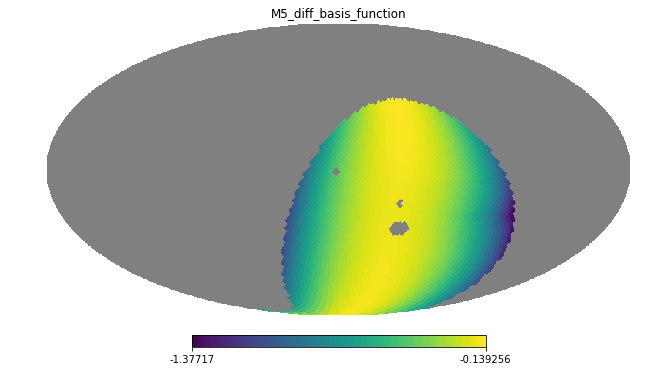

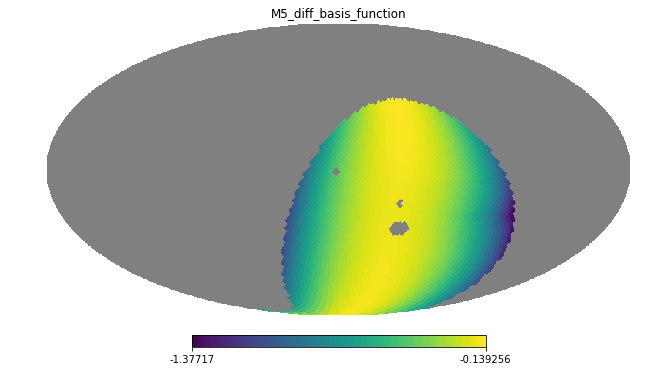

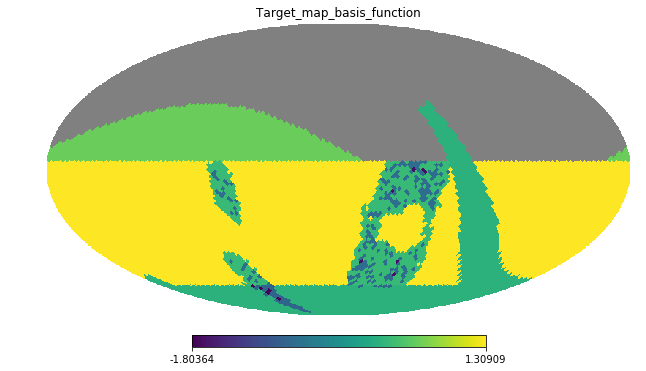

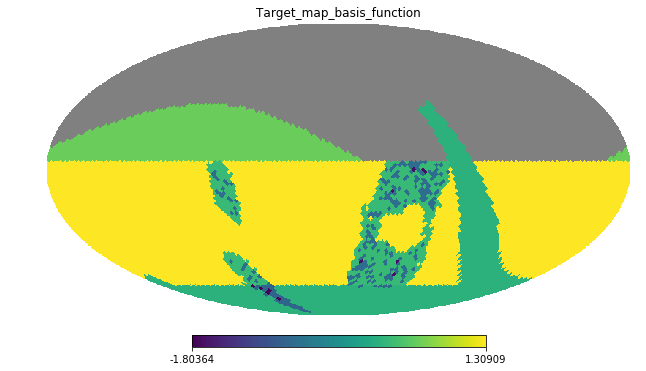

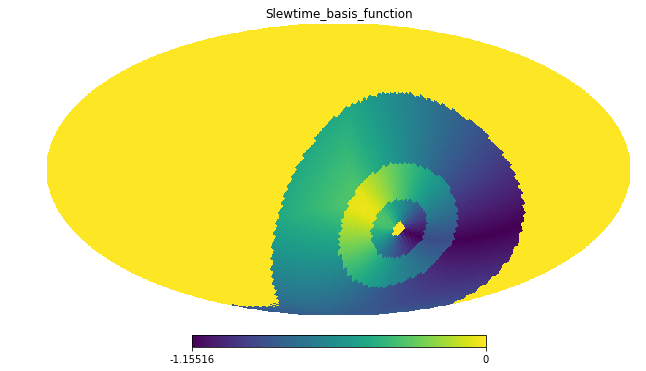

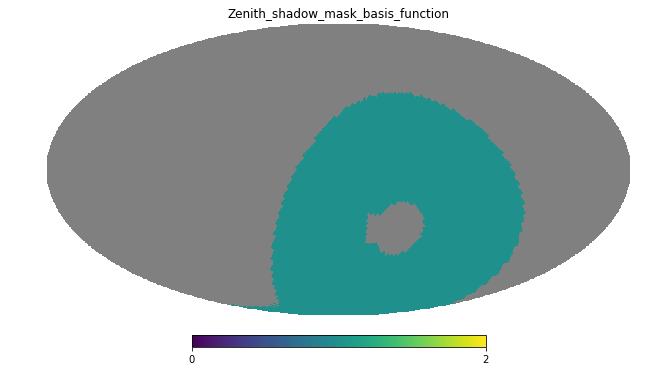

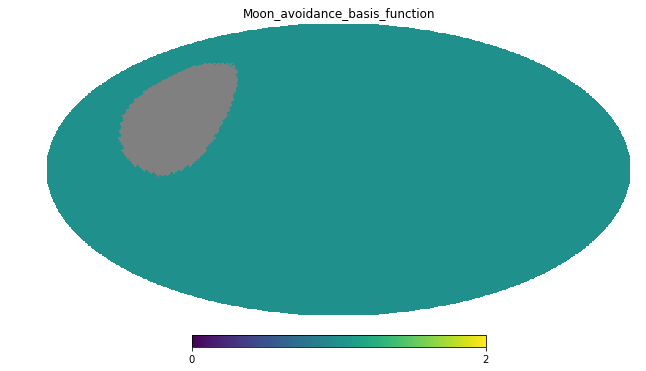

In [21]:
for bf in scheduler.survey_lists[1][2].basis_functions:
    val = bf(conditions)
    if np.size(val) > 1:
        title = bf.__class__.__name__
        hp.mollview(val, title=title)
        plt.savefig('talk_plots/'+title+'.pdf')

In [22]:
scheduler.survey_lists[1][2].basis_weights

array([ 3. ,  3. ,  0.3,  0.3,  3. ,  3. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

In [23]:
indices = range(len(scheduler.survey_lists[1][2].basis_functions))
rough_rw = np.zeros(hp.nside2npix(nside))
for ind in indices:
    rough_rw += scheduler.survey_lists[1][2].basis_functions[ind](conditions)*scheduler.survey_lists[1][2].basis_weights[ind]

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


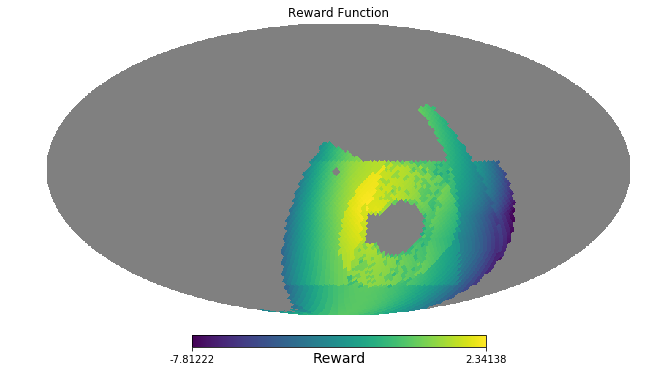

In [24]:
hp.mollview(rough_rw, title='Reward Function', unit='Reward')
plt.savefig('talk_plots/reward.pdf')

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


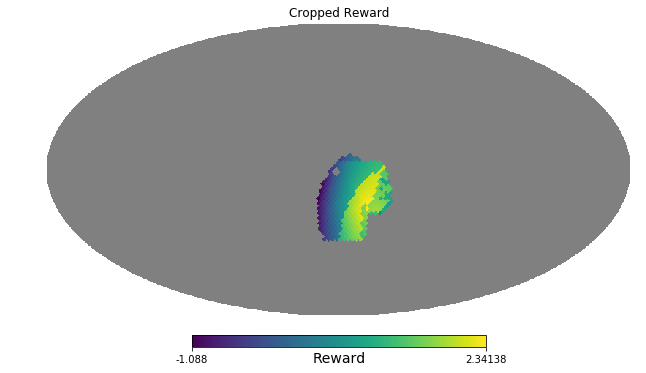

In [25]:
rf = scheduler.survey_lists[1][2].calc_reward_function(conditions)
hp.mollview(rf, title='Cropped Reward', unit='Reward')
plt.savefig('talk_plots/cropped.pdf')

In [26]:
new_observations = scheduler.survey_lists[1][2].generate_observations(conditions)

In [27]:
obs_map = np.zeros(hp.nside2npix(nside))
obs_map[np.where(rf > -1000)] = 0.5
for i, obs in enumerate(new_observations):
    indx = scheduler.pointing2hpindx(obs['RA'], obs['dec'], rotSkyPos=obs['rotSkyPos'])
    obs_map[indx] += 1

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


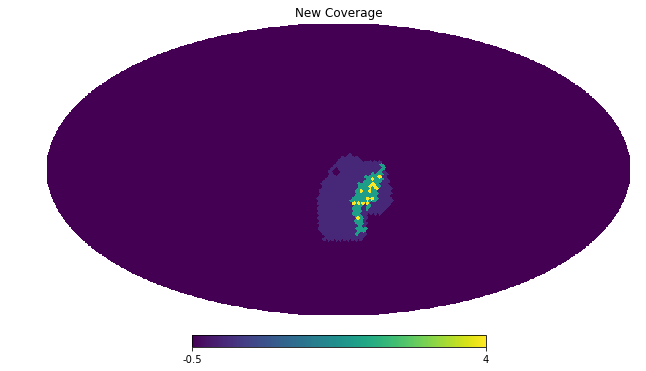

In [28]:

hp.mollview(obs_map-0.5, title='New Coverage')
plt.savefig('talk_plots/coverage.pdf')

In [29]:
new_observations = np.concatenate(new_observations)


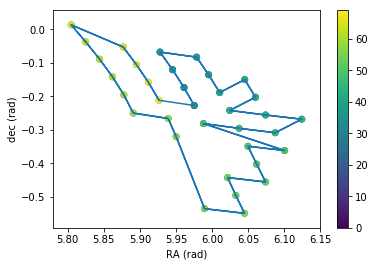

In [30]:
oid = np.arange(new_observations['RA'].size)
plt.scatter(new_observations['RA'], new_observations['dec'], c=oid)
plt.plot(new_observations['RA'], new_observations['dec'])
plt.colorbar()
plt.xlabel('RA (rad)')
plt.ylabel('dec (rad)')

In [31]:
# Let's do that in alt/az
alt, az = _approx_RaDec2AltAz(new_observations['RA'], new_observations['dec'],
                              conditions.site.latitude_rad,
                              conditions.site.longitude_rad, conditions.mjd)
alt = np.degrees(alt)
az = np.degrees(az)

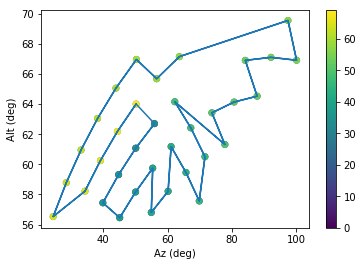

In [32]:
plt.scatter(az, alt, c=oid)
plt.plot(az, alt)
plt.colorbar()
plt.xlabel('Az (deg)')
plt.ylabel('Alt (deg)')
plt.savefig('talk_plots/altaz.pdf')